# Comparación de métodos de ordenamiento para la clasificación de resultados deportivos por puntuación o tiempo

Importaciones

In [65]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import time

## Métodos de ordenamiento utilizados

### MergeSort

In [49]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = mergeSort(left_half)
    right_half = mergeSort(right_half)

    return merge(left_half, right_half)


def merge(left, right):
    result = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index][1] <= right[right_index][1]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    while left_index < len(left):
        result.append(left[left_index])
        left_index += 1

    while right_index < len(right):
        result.append(right[right_index])
        right_index += 1

    return result

### Heap Sort

In [50]:
def heapify(arr, n, i):
    largest = i  
    left = 2 * i + 1  
    right = 2 * i + 2 

    if left < n and arr[left][1] > arr[largest][1]:
        largest = left

    if right < n and arr[right][1] > arr[largest][1]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] 
        heapify(arr, n, largest) 

def heapSort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0) 

### Tim Sort

In [52]:
def timSort(arr):
    min_run = 32
    n = len(arr)

    for i in range(0, n, min_run):
        insertionSort(arr, i, min((i + min_run - 1), (n - 1)))

    size = min_run
    while size < n:
        for start in range(0, n, size * 2):
            mid = start + size - 1
            end = min((start + size * 2 - 1), (n - 1))

            merged = mergeTim(arr, start, mid, end)
            arr[start:start + len(merged)] = merged

        size *= 2

    return arr

def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        key_item = arr[i]
        j = i - 1
        while j >= left and arr[j][1] > key_item[1]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_item

def mergeTim(arr, start, mid, end):
    left = arr[start:mid + 1]
    right = arr[mid + 1:end + 1]

    left_cursor, right_cursor = 0, 0
    merged = []

    while left_cursor < len(left) and right_cursor < len(right):
        if left[left_cursor][1] <= right[right_cursor][1]:
            merged.append(left[left_cursor])
            left_cursor += 1
        else:
            merged.append(right[right_cursor])
            right_cursor += 1

    merged += left[left_cursor:]
    merged += right[right_cursor:]

    return merged


### Función para calcular el tiempo de rendimiento de diferentes métodos de ordenamiento

In [90]:
def methodsPerformance(methods_list, size, lists):
    results = {method.__name__: [] for method in methods_list}

    for method in methods_list:
        times = []
        for data_list in lists:
            test_list = data_list[:size]
            start = time.time()
            method(test_list)
            end = time.time()
            times.append(end - start)
        results[method.__name__] = times

    return results

def showResults(results, size, table_names):
    print(f"\nGrafico para tamaño de datos {size}:\n")
    plt.figure()
    for method, times in results.items():
        plt.plot(table_names, times, label=method)

    plt.xlabel('Conjunto de Datos')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Rendimiento de métodos de ordenamiento para tamaño de datos {size}')
    plt.legend()
    plt.show()

    data = {'Conjunto de Datos': table_names}
    for method, times in results.items():
        data[method] = times

    df = pd.DataFrame(data)
    print(f"\nTabla para tamaño de datos {size}:\n")
    print(df)

### Algunas otras funciones utilizadas

In [5]:
import random

def toSeconds(time):
    if '-' in time: 
        return None  
    else:
        hours, minutes, seconds = map(int, time.split(':'))
        time_in_seconds = hours * 3600 + minutes * 60 + seconds
        return time_in_seconds

## Clasificación de resultados por tiempo

### Descarga del dataset desde Kaggle

Decidimos utilizar un conjunto de datos de Kaggle ([Finishers Boston Marathon 2015, 2016 & 2017](https://www.kaggle.com/datasets/rojour/boston-results/data?select=marathon_results_2016.csv)) para llevar a cabo pruebas de rendimiento con los métodos de ordenamiento seleccionados. Este conjunto de datos proporciona información sobre los tiempos finales en diversas longitudes de corredores en la Maratón de Boston de 2016.

In [7]:
ruta_archivo = 'kaggle/marathon_results_2016.csv'
marathon_results = pd.read_csv(ruta_archivo)

marathon_results.head(200)

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,904,"Beauchamp, Thomas E",27,M,Smyrna,GA,USA,NaN,NaN,0:18:34,...,1:33:42,1:53:48,2:14:23,2:34:00,0:06:13,2:42:55,2:42:55,196,182,158
196,887,"Quick, Michael",28,M,Saint Louis,MO,USA,NaN,NaN,0:19:31,...,1:36:20,1:55:26,2:15:01,2:34:23,0:06:13,2:42:57,2:42:57,197,183,159
197,315,"Weston, Rob",27,M,Middletown,CT,USA,NaN,NaN,0:17:49,...,1:30:59,1:50:49,2:11:17,2:32:44,0:06:14,2:43:01,2:43:01,198,184,160
198,1164,"Gervais, David A Jr.",25,M,Nashua,NH,USA,NaN,NaN,0:18:47,...,1:33:05,1:52:59,2:13:30,2:33:55,0:06:14,2:43:02,2:43:02,199,185,161


### Preprocesamiento de los datos

Para facilitar las pruebas realizaremos un preprocesamiento de los datos, en el cual definiremos que columnas nos son útiles y eliminaremos valores que puedan interferir con el experimento.

Veamos el tamaño del dataset

In [8]:
print(f'Marathon results shape: {marathon_results.shape}')

Marathon results shape: (26630, 24)


Veamos de qué columnas tenemos y el tipo de dato almacenada en cada una de ellas

In [9]:
columns = marathon_results.columns

for column in columns:
  print('%20s'%column, marathon_results[column].dtype)

                 Bib object
                Name object
                 Age int64
                 M/F object
                City object
               State object
             Country object
             Citizen object
          Unnamed: 8 object
                  5K object
                 10K object
                 15K object
                 20K object
                Half object
                 25K object
                 30K object
                 35K object
                 40K object
                Pace object
           Proj Time object
       Official Time object
             Overall int64
              Gender int64
            Division int64


Para realizar las pruebas con los métodos de ordenamiento seleccionados necesitaremos solo las columnas: Bib, 5k, 10k, 20k, Half, 25K, 30K, 35K y 40k. Dichas columnas representan el número asignado al corredor y los distintos tiempos que demoró en recorrer las diferentes distancias.

In [10]:
columns_to_delete = ['Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 8', 'Pace', 'Proj Time', 
                     'Official Time', 'Overall', 'Gender', 'Division']

marathon_results = marathon_results.drop(columns = columns_to_delete)

In [11]:
columns = marathon_results.columns

for column in columns:
  print('%20s'%column, marathon_results[column].dtype)

                 Bib object
                  5K object
                 10K object
                 15K object
                 20K object
                Half object
                 25K object
                 30K object
                 35K object
                 40K object


In [12]:
marathon_results.head(200)

,Bib,5K,10K,15K,20K,Half,25K,30K,35K,40K
0,5,0:15:47,0:31:20,0:47:07,1:03:14,1:06:45,1:19:15,1:34:17,1:50:24,2:05:59
1,1,0:15:47,0:31:21,0:47:08,1:03:14,1:06:46,1:19:15,1:34:17,1:50:24,2:05:59
2,6,0:15:46,0:31:20,0:47:07,1:03:13,1:06:44,1:19:15,1:34:45,1:50:48,2:06:47
3,11,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47
4,14,0:15:46,0:31:21,0:47:08,1:03:14,1:06:46,1:19:18,1:34:46,1:51:30,2:08:11
...,...,...,...,...,...,...,...,...,...,...
195,904,0:18:34,0:37:01,0:55:36,1:14:32,1:18:42,1:33:42,1:53:48,2:14:23,2:34:00
196,887,0:19:31,0:38:58,0:58:26,1:17:38,1:21:45,1:36:20,1:55:26,2:15:01,2:34:23
197,315,0:17:49,0:35:42,0:53:51,1:12:22,1:16:25,1:30:59,1:50:49,2:11:17,2:32:44
198,1164,0:18:47,0:36:58,0:55:28,1:14:07,1:18:11,1:33:05,1:52:59,2:13:30,2:33:55


Ahora podemos ver que los tiempos están dados en formato horas:minutos:segundos, necesitamos hacer la conversión a segundos, así quedaríamos con números enteros un poco más trabajables.

In [13]:
time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']

for column in time_columns:
    marathon_results[column] = marathon_results[column].apply(toSeconds)

marathon_results.head(200)

,Bib,5K,10K,15K,20K,Half,25K,30K,35K,40K
0,5,947.0,1880.0,2827.0,3794.0,4005.0,4755.0,5657.0,6624.0,7559.0
1,1,947.0,1881.0,2828.0,3794.0,4006.0,4755.0,5657.0,6624.0,7559.0
2,6,946.0,1880.0,2827.0,3793.0,4004.0,4755.0,5685.0,6648.0,7607.0
3,11,946.0,1881.0,2827.0,3794.0,4006.0,4756.0,5685.0,6648.0,7607.0
4,14,946.0,1881.0,2828.0,3794.0,4006.0,4758.0,5686.0,6690.0,7691.0
...,...,...,...,...,...,...,...,...,...,...
195,904,1114.0,2221.0,3336.0,4472.0,4722.0,5622.0,6828.0,8063.0,9240.0
196,887,1171.0,2338.0,3506.0,4658.0,4905.0,5780.0,6926.0,8101.0,9263.0
197,315,1069.0,2142.0,3231.0,4342.0,4585.0,5459.0,6649.0,7877.0,9164.0
198,1164,1127.0,2218.0,3328.0,4447.0,4691.0,5585.0,6779.0,8010.0,9235.0


Para facilitar las pruebas eliminaremos filas que contengan valores nulos (None, NaN).

In [14]:
nan = marathon_results.isna().sum()

print('Valores nulos por columna:')
print(nan)

Valores nulos por columna:
Bib      0
5K      52
10K     29
15K     14
20K     23
Half    17
25K     10
30K     24
35K     12
40K     14
dtype: int64


In [15]:
columns = marathon_results.columns
for column in columns:
    marathon_results = marathon_results.dropna(subset=[column])

nan = marathon_results.isna().sum()

print('Valores nulos por columna:')
print(nan)

Valores nulos por columna:
Bib     0
5K      0
10K     0
15K     0
20K     0
Half    0
25K     0
30K     0
35K     0
40K     0
dtype: int64


In [16]:
print(f'Marathon results shape: {marathon_results.shape}')

Marathon results shape: (26481, 10)


### Hora de probar

Para establecer un orden de llegada de los corredores en cada distancia según sus tiempos, generaremos listas de tuplas. Cada tupla contendrá el número del corredor y su respectivo tiempo de llegada.

In [17]:
times_5k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['5K'])]
times_10k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['10K'])]
times_15k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['15K'])]
times_20k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['20K'])]
times_half = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['Half'])]
times_25k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['25K'])]
times_30k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['30K'])]
times_35k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['35K'])]
times_40k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['40K'])]

Los tiempos de llegada ya se encuentran desordenados, pero para evitar sesgos, procederemos a aleatorizar estas listas.

In [18]:
lists = [times_5k, times_10k, times_15k, times_20k, times_half, times_25k, times_30k, times_35k, times_40k]

for list in lists:
    random.shuffle(list)
    print("Randomized list:", list[:10])

Randomized list: [('14170', 1636.0), ('7247', 1351.0), ('1163', 1208.0), ('25525', 1790.0), ('896', 1144.0), ('24403', 1653.0), ('25206', 1685.0), ('8443', 1341.0), ('11676', 1413.0), ('20712', 1595.0)]
Randomized list: [('14881', 2987.0), ('28935', 3243.0), ('21257', 3254.0), ('2600', 2785.0), ('2809', 2426.0), ('F5', 2180.0), ('28320', 3728.0), ('30636', 3967.0), ('29642', 3566.0), ('16888', 2861.0)]
Randomized list: [('20569', 4786.0), ('15516', 5405.0), ('12164', 4332.0), ('31974', 6000.0), ('28182', 5598.0), ('19635', 4668.0), ('25001', 5324.0), ('4198', 3874.0), ('5354', 3759.0), ('4422', 3634.0)]
Randomized list: [('1915', 5362.0), ('31460', 7059.0), ('25941', 7624.0), ('4612', 5153.0), ('25092', 7031.0), ('10288', 5603.0), ('30528', 7637.0), ('4746', 4969.0), ('21838', 5948.0), ('4870', 6367.0)]
Randomized list: [('31408', 6866.0), ('31654', 8211.0), ('1537', 5052.0), ('12617', 6728.0), ('9736', 6047.0), ('6680', 5476.0), ('28944', 8057.0), ('18964', 6561.0), ('30409', 8579.0),

Con el fin de preservar la integridad de los datos y evitar posibles errores o distorsiones en los resultados, crearemos copias de las listas que se utilizarán en cada una de las pruebas planificadas. Así nos aseguraremos que las listas sean las mismas ordenadas en cada uno de los métodos.

#### Pruebas y graficas


Grafico para tamaño de datos 861:



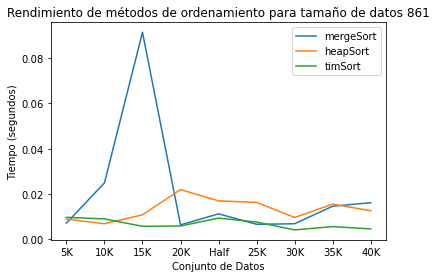


Tabla para tamaño de datos 861:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.007123  0.008897  0.009669
1               10K   0.024874  0.006832  0.008979
2               15K   0.091484  0.010799  0.005703
3               20K   0.006356  0.021932  0.005844
4              Half   0.011219  0.016943  0.009338
5               25K   0.006590  0.016289  0.007585
6               30K   0.006849  0.009606  0.004115
7               35K   0.014597  0.015517  0.005582
8               40K   0.016126  0.012574  0.004562

Grafico para tamaño de datos 1722:



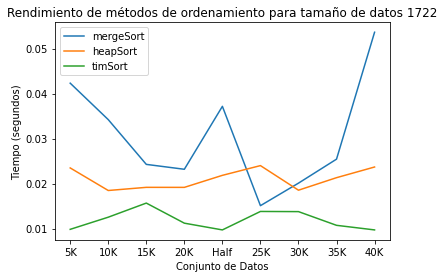


Tabla para tamaño de datos 1722:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.042321  0.023484  0.009836
1               10K   0.034221  0.018468  0.012537
2               15K   0.024272  0.019170  0.015673
3               20K   0.023186  0.019164  0.011208
4              Half   0.037172  0.021836  0.009709
5               25K   0.015097  0.024000  0.013811
6               30K   0.020102  0.018535  0.013774
7               35K   0.025435  0.021318  0.010729
8               40K   0.053639  0.023690  0.009708

Grafico para tamaño de datos 2583:



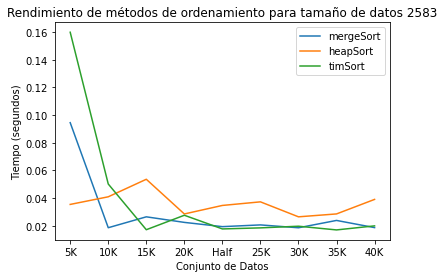


Tabla para tamaño de datos 2583:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.094559  0.035476  0.159926
1               10K   0.018640  0.040989  0.050231
2               15K   0.026511  0.053653  0.017193
3               20K   0.022490  0.028584  0.027645
4              Half   0.019416  0.034740  0.017760
5               25K   0.020668  0.037335  0.018526
6               30K   0.018598  0.026513  0.019723
7               35K   0.023905  0.028605  0.017049
8               40K   0.018714  0.039102  0.019969

Grafico para tamaño de datos 3444:



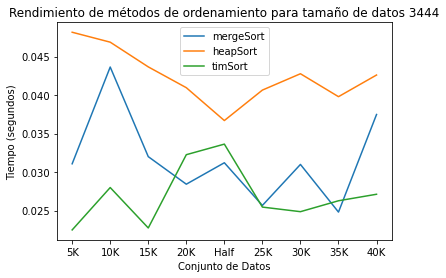


Tabla para tamaño de datos 3444:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.031079  0.048164  0.022491
1               10K   0.043647  0.046875  0.027995
2               15K   0.032009  0.043667  0.022746
3               20K   0.028430  0.040964  0.032261
4              Half   0.031213  0.036695  0.033634
5               25K   0.025670  0.040651  0.025457
6               30K   0.030996  0.042775  0.024860
7               35K   0.024807  0.039796  0.026277
8               40K   0.037480  0.042608  0.027123

Grafico para tamaño de datos 4305:



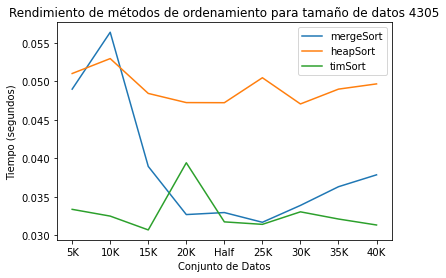


Tabla para tamaño de datos 4305:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.048990  0.051018  0.033393
1               10K   0.056373  0.052955  0.032515
2               15K   0.038962  0.048434  0.030723
3               20K   0.032715  0.047245  0.039435
4              Half   0.032975  0.047230  0.031767
5               25K   0.031714  0.050469  0.031445
6               30K   0.033903  0.047069  0.033070
7               35K   0.036329  0.048992  0.032137
8               40K   0.037871  0.049671  0.031362

Grafico para tamaño de datos 5166:



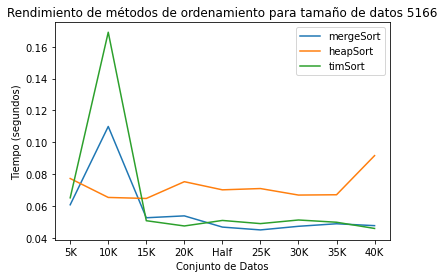


Tabla para tamaño de datos 5166:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.060764  0.077268  0.065140
1               10K   0.109931  0.065375  0.169100
2               15K   0.052617  0.064732  0.050762
3               20K   0.053801  0.075262  0.047464
4              Half   0.046759  0.070150  0.050929
5               25K   0.044984  0.070960  0.048948
6               30K   0.047256  0.066868  0.051214
7               35K   0.048849  0.067060  0.049805
8               40K   0.047663  0.091632  0.045903

Grafico para tamaño de datos 6027:



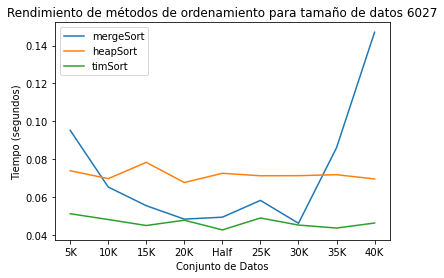


Tabla para tamaño de datos 6027:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.095223  0.073852  0.051123
1               10K   0.065225  0.069671  0.048049
2               15K   0.055352  0.078277  0.044885
3               20K   0.048259  0.067602  0.047694
4              Half   0.049292  0.072499  0.042557
5               25K   0.058167  0.071185  0.048864
6               30K   0.046054  0.071235  0.045121
7               35K   0.086000  0.071750  0.043548
8               40K   0.147060  0.069505  0.046203

Grafico para tamaño de datos 6888:



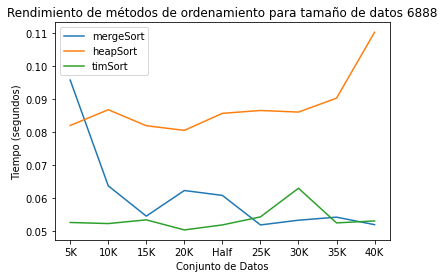


Tabla para tamaño de datos 6888:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.095705  0.081935  0.052515
1               10K   0.063624  0.086706  0.052182
2               15K   0.054442  0.081858  0.053310
3               20K   0.062202  0.080448  0.050257
4              Half   0.060725  0.085611  0.051771
5               25K   0.051765  0.086481  0.054206
6               30K   0.053202  0.085992  0.062895
7               35K   0.054123  0.090212  0.052386
8               40K   0.051851  0.110208  0.052982

Grafico para tamaño de datos 7749:



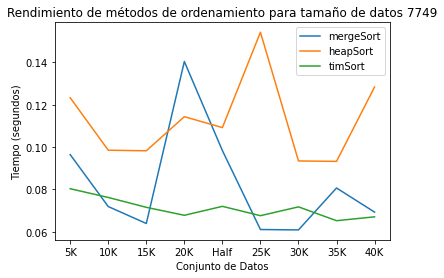


Tabla para tamaño de datos 7749:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.096466  0.123320  0.080349
1               10K   0.071928  0.098544  0.076225
2               15K   0.063935  0.098264  0.071572
3               20K   0.140430  0.114377  0.067798
4              Half   0.098378  0.109224  0.072028
5               25K   0.061086  0.154254  0.067616
6               30K   0.060896  0.093469  0.071782
7               35K   0.080699  0.093269  0.065250
8               40K   0.069302  0.128398  0.067073

Grafico para tamaño de datos 8610:



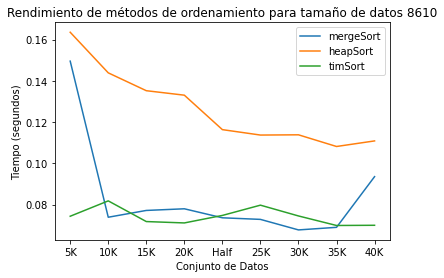


Tabla para tamaño de datos 8610:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.149519  0.163517  0.074385
1               10K   0.073906  0.143847  0.081830
2               15K   0.077195  0.135200  0.071808
3               20K   0.077994  0.133030  0.071142
4              Half   0.073630  0.116337  0.074778
5               25K   0.072861  0.113713  0.079753
6               30K   0.067760  0.113830  0.074523
7               35K   0.069011  0.108173  0.069908
8               40K   0.093566  0.110875  0.070005

Grafico para tamaño de datos 9471:



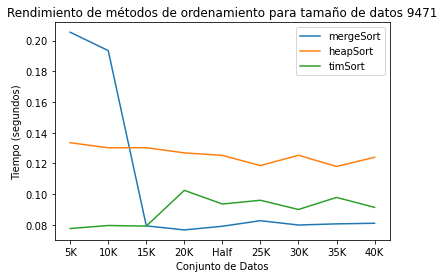


Tabla para tamaño de datos 9471:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.205396  0.133490  0.077624
1               10K   0.193434  0.130181  0.079592
2               15K   0.079363  0.130238  0.079222
3               20K   0.076726  0.126872  0.102472
4              Half   0.079118  0.125233  0.093586
5               25K   0.082722  0.118608  0.096028
6               30K   0.079905  0.125331  0.090022
7               35K   0.080667  0.118031  0.097876
8               40K   0.081060  0.123984  0.091416

Grafico para tamaño de datos 10332:



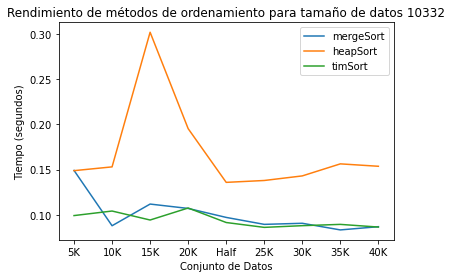


Tabla para tamaño de datos 10332:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.149076  0.148807  0.099008
1               10K   0.087744  0.153000  0.104049
2               15K   0.111771  0.302268  0.094087
3               20K   0.106925  0.195392  0.107406
4              Half   0.096974  0.135825  0.091318
5               25K   0.089262  0.137909  0.085928
6               30K   0.090466  0.142989  0.087816
7               35K   0.083109  0.156343  0.089245
8               40K   0.086681  0.153670  0.086272

Grafico para tamaño de datos 11193:



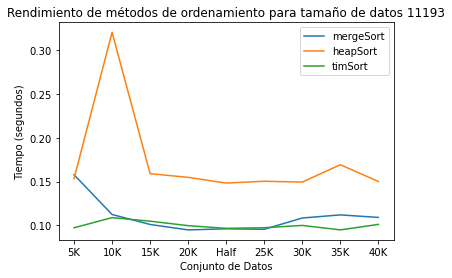


Tabla para tamaño de datos 11193:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.157905  0.153372  0.097365
1               10K   0.112527  0.320450  0.108936
2               15K   0.101128  0.159077  0.104892
3               20K   0.094923  0.154891  0.099781
4              Half   0.096188  0.148367  0.096711
5               25K   0.095621  0.150447  0.097428
6               30K   0.108516  0.149488  0.100048
7               35K   0.112057  0.169305  0.094969
8               40K   0.109182  0.150174  0.101204

Grafico para tamaño de datos 12054:



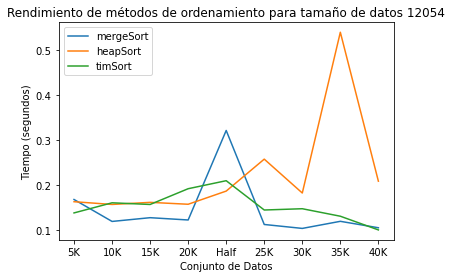


Tabla para tamaño de datos 12054:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.167725  0.162794  0.137785
1               10K   0.118801  0.156667  0.160349
2               15K   0.127161  0.161339  0.156633
3               20K   0.122058  0.157104  0.191757
4              Half   0.321614  0.186471  0.209608
5               25K   0.112028  0.257676  0.144290
6               30K   0.103256  0.182163  0.147135
7               35K   0.119060  0.540594  0.130422
8               40K   0.104707  0.208545  0.099898

Grafico para tamaño de datos 12915:



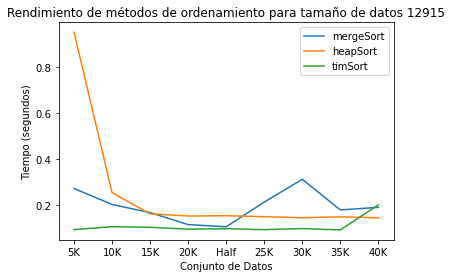


Tabla para tamaño de datos 12915:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.273374  0.948803  0.095529
1               10K   0.204193  0.255214  0.108135
2               15K   0.169068  0.163596  0.105569
3               20K   0.117229  0.154382  0.097349
4              Half   0.107826  0.155639  0.099400
5               25K   0.214682  0.151367  0.095457
6               30K   0.313107  0.146994  0.100139
7               35K   0.180568  0.150759  0.094225
8               40K   0.191831  0.146748  0.202415

Grafico para tamaño de datos 13776:



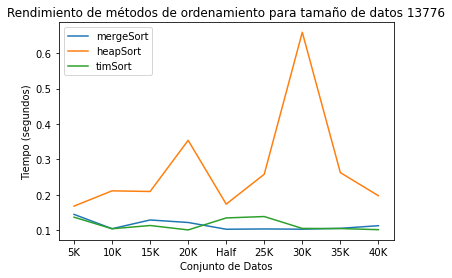


Tabla para tamaño de datos 13776:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.144497  0.167854  0.136587
1               10K   0.104027  0.211025  0.103835
2               15K   0.128688  0.209145  0.113061
3               20K   0.121627  0.353689  0.100624
4              Half   0.102513  0.173518  0.134454
5               25K   0.103342  0.257855  0.138416
6               30K   0.102661  0.658964  0.104853
7               35K   0.105111  0.262513  0.104429
8               40K   0.112560  0.197212  0.101341

Grafico para tamaño de datos 14637:



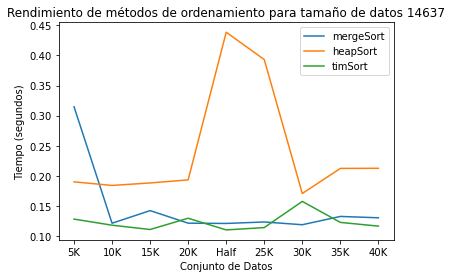


Tabla para tamaño de datos 14637:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.314715  0.189886  0.127960
1               10K   0.121125  0.183887  0.117809
2               15K   0.142071  0.188036  0.110675
3               20K   0.121202  0.193140  0.129403
4              Half   0.120735  0.438516  0.109987
5               25K   0.123185  0.393143  0.113875
6               30K   0.118610  0.170489  0.157380
7               35K   0.132394  0.212204  0.122483
8               40K   0.130150  0.212420  0.116290

Grafico para tamaño de datos 15498:



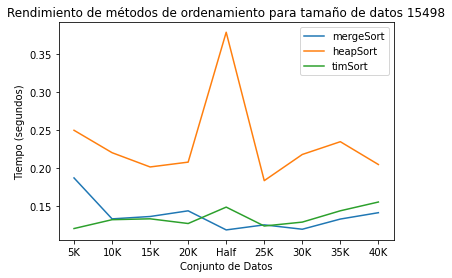


Tabla para tamaño de datos 15498:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.186731  0.249451  0.120106
1               10K   0.132842  0.219949  0.131758
2               15K   0.135953  0.201174  0.132915
3               20K   0.143430  0.207530  0.126726
4              Half   0.118296  0.378508  0.148318
5               25K   0.124937  0.183151  0.123439
6               30K   0.119185  0.217610  0.128585
7               35K   0.132593  0.234424  0.143476
8               40K   0.140964  0.204383  0.155020

Grafico para tamaño de datos 16359:



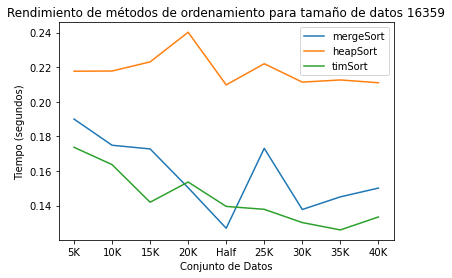


Tabla para tamaño de datos 16359:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.190013  0.217673  0.173694
1               10K   0.174877  0.217780  0.163682
2               15K   0.172760  0.223059  0.141946
3               20K   0.150331  0.240196  0.153628
4              Half   0.126906  0.209759  0.139524
5               25K   0.173089  0.222002  0.137841
6               30K   0.137744  0.211360  0.130188
7               35K   0.145046  0.212627  0.125940
8               40K   0.150116  0.211005  0.133411

Grafico para tamaño de datos 17220:



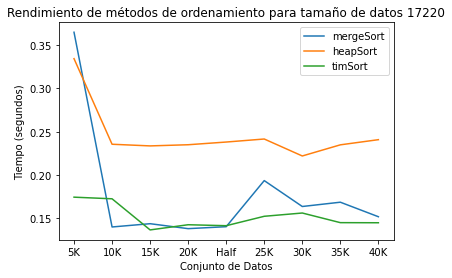


Tabla para tamaño de datos 17220:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.364584  0.334139  0.174501
1               10K   0.140143  0.235492  0.172619
2               15K   0.143920  0.233583  0.136753
3               20K   0.138212  0.234927  0.142727
4              Half   0.140473  0.238041  0.141607
5               25K   0.193597  0.241535  0.152464
6               30K   0.163747  0.221979  0.156233
7               35K   0.168689  0.234815  0.145129
8               40K   0.151956  0.240765  0.145008

Grafico para tamaño de datos 18081:



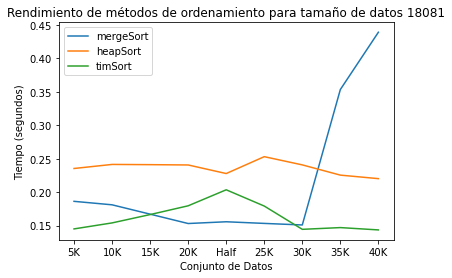


Tabla para tamaño de datos 18081:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.186294  0.235358  0.145108
1               10K   0.181102  0.241416  0.154067
2               15K   0.167147  0.241078  0.166528
3               20K   0.153155  0.240604  0.179627
4              Half   0.155778  0.227799  0.203536
5               25K   0.153326  0.253000  0.179246
6               30K   0.150993  0.240726  0.144475
7               35K   0.353274  0.225440  0.147074
8               40K   0.438855  0.220181  0.143601

Grafico para tamaño de datos 18942:



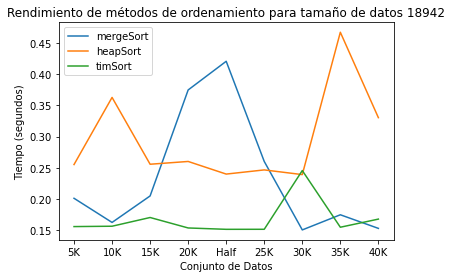


Tabla para tamaño de datos 18942:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.201316  0.255292  0.156045
1               10K   0.162689  0.362703  0.156625
2               15K   0.205077  0.255795  0.170574
3               20K   0.374644  0.260239  0.153843
4              Half   0.420503  0.240048  0.151670
5               25K   0.260245  0.246722  0.151726
6               30K   0.150714  0.239212  0.245696
7               35K   0.174942  0.466972  0.155011
8               40K   0.153179  0.330309  0.168015

Grafico para tamaño de datos 19803:



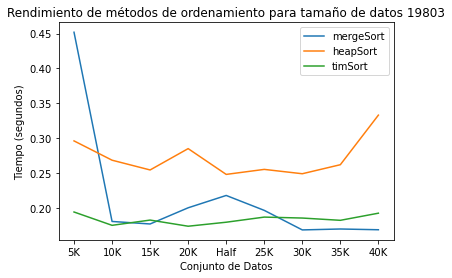


Tabla para tamaño de datos 19803:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.451901  0.296296  0.194460
1               10K   0.180915  0.268647  0.175368
2               15K   0.177307  0.254663  0.182892
3               20K   0.200486  0.285234  0.174090
4              Half   0.218153  0.248305  0.179822
5               25K   0.196788  0.255481  0.187157
6               30K   0.168797  0.249251  0.185796
7               35K   0.170112  0.262181  0.182542
8               40K   0.169037  0.333181  0.192750

Grafico para tamaño de datos 20664:



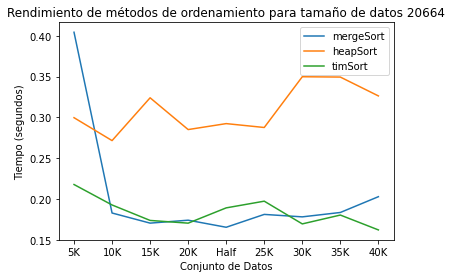


Tabla para tamaño de datos 20664:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.404264  0.299537  0.217634
1               10K   0.182709  0.271459  0.192565
2               15K   0.170313  0.323924  0.173610
3               20K   0.173911  0.284982  0.170273
4              Half   0.165239  0.292278  0.189004
5               25K   0.180995  0.287522  0.197214
6               30K   0.177991  0.349718  0.169358
7               35K   0.183365  0.349335  0.180209
8               40K   0.202708  0.326227  0.161987

Grafico para tamaño de datos 21525:



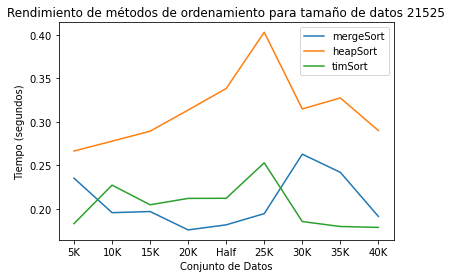


Tabla para tamaño de datos 21525:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.235175  0.266455  0.182865
1               10K   0.195486  0.277785  0.227181
2               15K   0.196789  0.289297  0.204579
3               20K   0.175619  0.313660  0.211889
4              Half   0.181462  0.338418  0.212049
5               25K   0.194370  0.403207  0.252866
6               30K   0.262807  0.314874  0.185243
7               35K   0.241924  0.327624  0.179548
8               40K   0.191153  0.289962  0.178505

Grafico para tamaño de datos 22386:



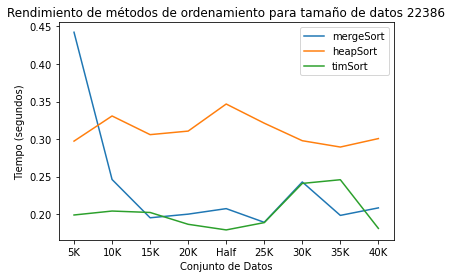


Tabla para tamaño de datos 22386:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.442252  0.297232  0.198855
1               10K   0.246130  0.330735  0.204114
2               15K   0.195140  0.305874  0.202213
3               20K   0.199985  0.310591  0.186462
4              Half   0.207330  0.346663  0.178977
5               25K   0.189099  0.321143  0.188702
6               30K   0.242840  0.297782  0.240907
7               35K   0.198318  0.289355  0.245825
8               40K   0.208318  0.300633  0.180997

Grafico para tamaño de datos 23247:



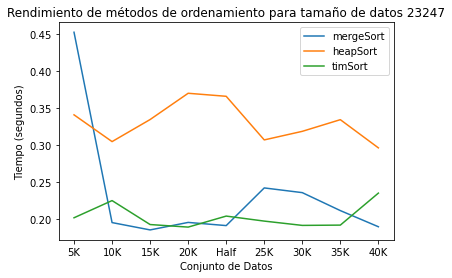


Tabla para tamaño de datos 23247:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.452098  0.340644  0.201723
1               10K   0.195222  0.304515  0.224904
2               15K   0.185329  0.334294  0.192586
3               20K   0.195451  0.369741  0.189129
4              Half   0.191163  0.365653  0.203994
5               25K   0.242002  0.306791  0.197233
6               30K   0.235639  0.318370  0.191433
7               35K   0.211404  0.334110  0.191817
8               40K   0.189608  0.296061  0.235001

Grafico para tamaño de datos 24108:



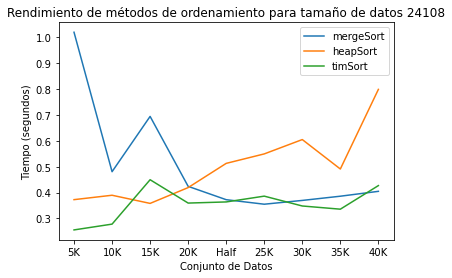


Tabla para tamaño de datos 24108:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   1.018726  0.372731  0.255928
1               10K   0.480597  0.389709  0.278298
2               15K   0.693926  0.358250  0.449612
3               20K   0.424026  0.419298  0.359523
4              Half   0.372566  0.512708  0.363900
5               25K   0.355126  0.549239  0.386271
6               30K   0.369740  0.604580  0.348267
7               35K   0.385995  0.490980  0.335943
8               40K   0.404809  0.798227  0.426943

Grafico para tamaño de datos 24969:



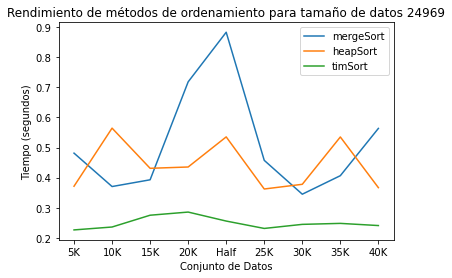


Tabla para tamaño de datos 24969:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.481377  0.371553  0.226540
1               10K   0.370518  0.564341  0.236171
2               15K   0.392914  0.431036  0.275330
3               20K   0.717989  0.435382  0.285771
4              Half   0.882667  0.535283  0.255932
5               25K   0.457433  0.362365  0.231440
6               30K   0.345096  0.377968  0.244958
7               35K   0.406562  0.535049  0.248225
8               40K   0.563469  0.366810  0.241027

Grafico para tamaño de datos 25830:



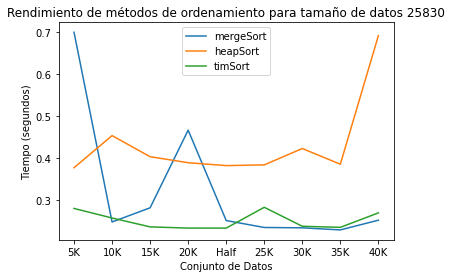


Tabla para tamaño de datos 25830:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.699531  0.377297  0.280343
1               10K   0.248180  0.453656  0.257610
2               15K   0.281873  0.403423  0.236481
3               20K   0.466644  0.389162  0.233635
4              Half   0.251581  0.382271  0.233535
5               25K   0.235049  0.383947  0.283090
6               30K   0.234283  0.422939  0.237954
7               35K   0.229274  0.385570  0.235407
8               40K   0.252419  0.691461  0.269787

Grafico para tamaño de datos 26481:



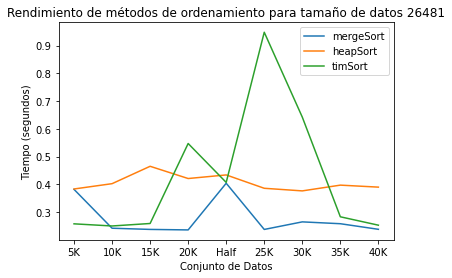


Tabla para tamaño de datos 26481:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.382220  0.383609  0.258140
1               10K   0.242350  0.402717  0.250415
2               15K   0.238048  0.465286  0.259369
3               20K   0.236243  0.421242  0.547340
4              Half   0.404278  0.434196  0.407215
5               25K   0.237937  0.386125  0.947861
6               30K   0.265200  0.376741  0.642334
7               35K   0.258551  0.397463  0.283485
8               40K   0.238433  0.390261  0.253280


In [91]:
sizes_data = [861, 1722, 2583, 3444, 4305, 5166, 6027, 6888, 7749, 8610, 9471, 10332, 11193, 12054, 12915, 13776, 14637, 15498, 16359, 17220, 18081, 18942, 19803, 20664, 21525, 22386, 23247, 24108, 24969, 25830, 26481]
table_names = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']
sort_methods = [mergeSort, heapSort, timSort]

for size in sizes_data:
    result = methodsPerformance(sort_methods, size, lists)
    showResults(result, size, table_names)


Grafico para tamaño de datos 861:



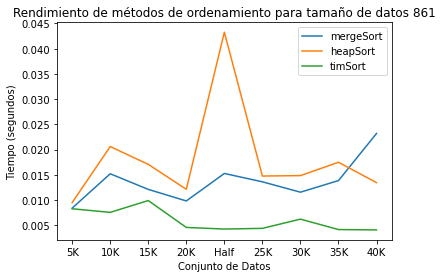


Tabla para tamaño de datos 861:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.008407  0.009503  0.008280
1               10K   0.015217  0.020612  0.007567
2               15K   0.012121  0.017082  0.009908
3               20K   0.009829  0.012146  0.004579
4              Half   0.015277  0.043267  0.004259
5               25K   0.013621  0.014766  0.004398
6               30K   0.011565  0.014853  0.006226
7               35K   0.013867  0.017496  0.004159
8               40K   0.023203  0.013461  0.004088

Grafico para tamaño de datos 1722:



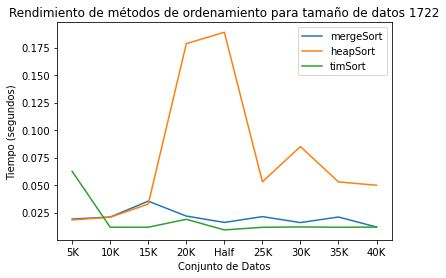


Tabla para tamaño de datos 1722:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.019086  0.018231  0.062447
1               10K   0.020903  0.020725  0.011656
2               15K   0.035322  0.032672  0.011636
3               20K   0.021783  0.178570  0.018835
4              Half   0.015991  0.188948  0.009185
5               25K   0.021271  0.052969  0.011559
6               30K   0.015844  0.084982  0.011903
7               35K   0.020929  0.052833  0.011613
8               40K   0.011816  0.049820  0.011775

Grafico para tamaño de datos 2583:



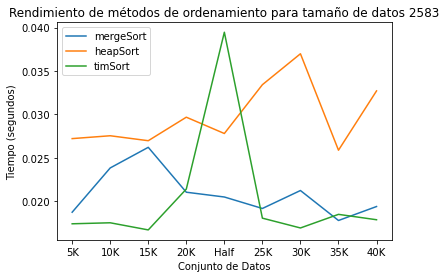


Tabla para tamaño de datos 2583:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.018725  0.027204  0.017392
1               10K   0.023825  0.027533  0.017508
2               15K   0.026200  0.026962  0.016686
3               20K   0.021029  0.029671  0.021390
4              Half   0.020478  0.027792  0.039457
5               25K   0.019156  0.033415  0.018041
6               30K   0.021224  0.036978  0.016911
7               35K   0.017772  0.025869  0.018478
8               40K   0.019380  0.032699  0.017858

Grafico para tamaño de datos 3444:



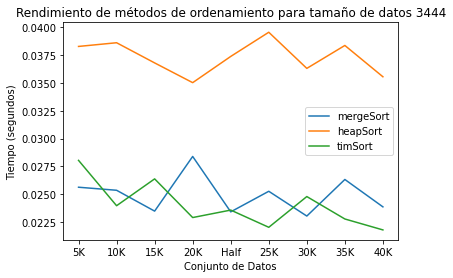


Tabla para tamaño de datos 3444:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.025617  0.038294  0.028035
1               10K   0.025343  0.038627  0.023952
2               15K   0.023466  0.036811  0.026369
3               20K   0.028388  0.035033  0.022887
4              Half   0.023399  0.037394  0.023559
5               25K   0.025252  0.039572  0.022009
6               30K   0.023021  0.036318  0.024777
7               35K   0.026315  0.038382  0.022758
8               40K   0.023849  0.035563  0.021773

Grafico para tamaño de datos 4305:



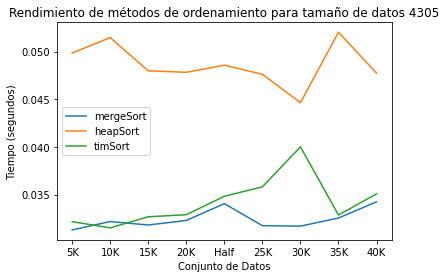


Tabla para tamaño de datos 4305:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.031291  0.049848  0.032154
1               10K   0.032169  0.051467  0.031506
2               15K   0.031807  0.047982  0.032668
3               20K   0.032285  0.047829  0.032887
4              Half   0.034047  0.048573  0.034820
5               25K   0.031734  0.047621  0.035811
6               30K   0.031688  0.044643  0.040005
7               35K   0.032538  0.052031  0.032854
8               40K   0.034240  0.047741  0.035075

Grafico para tamaño de datos 5166:



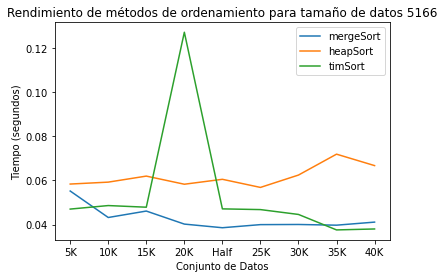


Tabla para tamaño de datos 5166:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.055175  0.058328  0.047003
1               10K   0.043196  0.059197  0.048596
2               15K   0.046112  0.061927  0.047852
3               20K   0.040212  0.058247  0.127008
4              Half   0.038564  0.060476  0.047096
5               25K   0.039971  0.056804  0.046774
6               30K   0.040038  0.062398  0.044575
7               35K   0.039722  0.071851  0.037577
8               40K   0.041106  0.066675  0.038005

Grafico para tamaño de datos 6027:



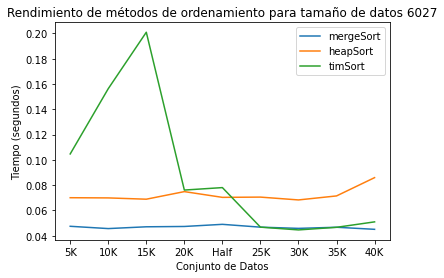


Tabla para tamaño de datos 6027:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.047463  0.070055  0.104661
1               10K   0.045648  0.069900  0.156267
2               15K   0.047064  0.068880  0.200888
3               20K   0.047320  0.074878  0.076110
4              Half   0.049003  0.070335  0.078052
5               25K   0.046776  0.070536  0.046786
6               30K   0.045815  0.068299  0.044593
7               35K   0.046701  0.071466  0.046648
8               40K   0.045064  0.085924  0.050955

Grafico para tamaño de datos 6888:



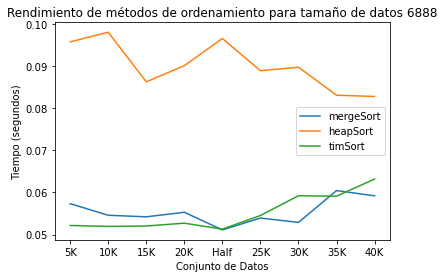


Tabla para tamaño de datos 6888:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.057321  0.095759  0.052143
1               10K   0.054575  0.098039  0.051926
2               15K   0.054203  0.086261  0.052025
3               20K   0.055283  0.090109  0.052692
4              Half   0.051093  0.096561  0.051272
5               25K   0.053915  0.088900  0.054517
6               30K   0.052875  0.089731  0.059210
7               35K   0.060436  0.083076  0.059105
8               40K   0.059190  0.082793  0.063172

Grafico para tamaño de datos 7749:



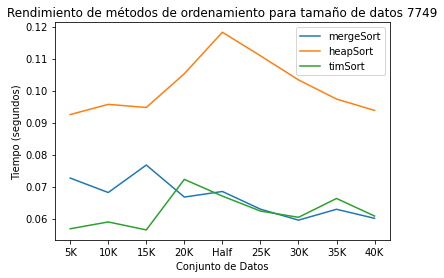


Tabla para tamaño de datos 7749:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.072647  0.092503  0.056798
1               10K   0.068129  0.095690  0.058929
2               15K   0.076721  0.094720  0.056439
3               20K   0.066709  0.105261  0.072233
4              Half   0.068453  0.118233  0.067016
5               25K   0.062930  0.110876  0.062332
6               30K   0.059494  0.103336  0.060375
7               35K   0.062888  0.097342  0.066270
8               40K   0.060063  0.093795  0.060777

Grafico para tamaño de datos 8610:



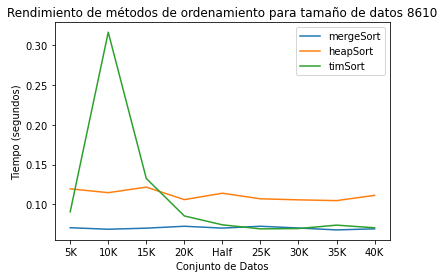


Tabla para tamaño de datos 8610:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.070611  0.119551  0.090677
1               10K   0.068707  0.114731  0.316600
2               15K   0.070055  0.121696  0.132583
3               20K   0.072465  0.105979  0.085426
4              Half   0.070135  0.114035  0.074265
5               25K   0.072454  0.107007  0.069184
6               30K   0.070251  0.105706  0.069571
7               35K   0.067853  0.104713  0.073876
8               40K   0.069223  0.111327  0.070527

Grafico para tamaño de datos 9471:



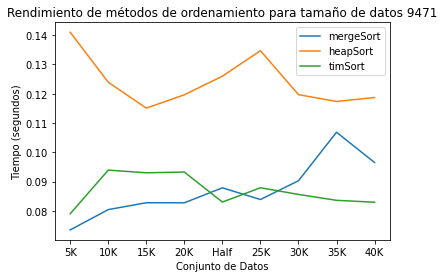


Tabla para tamaño de datos 9471:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.073524  0.141005  0.079044
1               10K   0.080458  0.123941  0.093936
2               15K   0.082801  0.115098  0.093024
3               20K   0.082783  0.119641  0.093279
4              Half   0.087891  0.126012  0.083028
5               25K   0.083898  0.134707  0.087920
6               30K   0.090313  0.119700  0.085632
7               35K   0.106863  0.117381  0.083629
8               40K   0.096534  0.118710  0.082971

Grafico para tamaño de datos 10332:



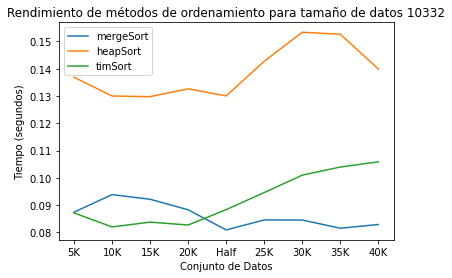


Tabla para tamaño de datos 10332:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.087419  0.136869  0.087119
1               10K   0.093842  0.129992  0.081990
2               15K   0.092131  0.129752  0.083754
3               20K   0.088277  0.132626  0.082694
4              Half   0.080899  0.130021  0.088340
5               25K   0.084566  0.142718  0.094599
6               30K   0.084511  0.153363  0.100977
7               35K   0.081524  0.152628  0.103954
8               40K   0.082884  0.139871  0.105858

Grafico para tamaño de datos 11193:



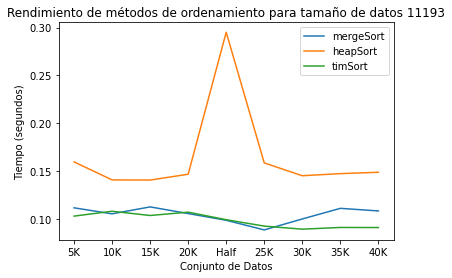


Tabla para tamaño de datos 11193:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.111787  0.159730  0.103124
1               10K   0.105517  0.140948  0.108202
2               15K   0.112748  0.140765  0.103791
3               20K   0.105817  0.146852  0.107241
4              Half   0.098787  0.295080  0.099386
5               25K   0.088723  0.158661  0.092685
6               30K   0.100154  0.145296  0.089502
7               35K   0.111245  0.147475  0.091289
8               40K   0.108538  0.148909  0.091188

Grafico para tamaño de datos 12054:



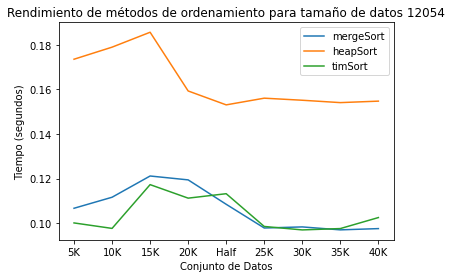


Tabla para tamaño de datos 12054:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.106679  0.173506  0.100104
1               10K   0.111624  0.178916  0.097651
2               15K   0.121148  0.185603  0.117278
3               20K   0.119406  0.159272  0.111218
4              Half   0.108461  0.153039  0.113209
5               25K   0.097833  0.156041  0.098521
6               30K   0.098318  0.155114  0.096972
7               35K   0.096997  0.154051  0.097579
8               40K   0.097559  0.154712  0.102514

Grafico para tamaño de datos 12915:



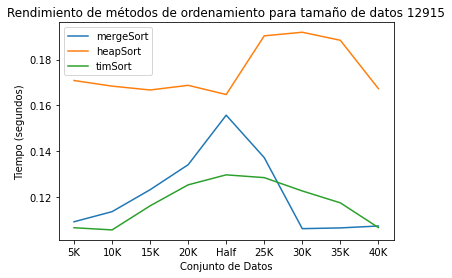


Tabla para tamaño de datos 12915:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.109262  0.170856  0.106663
1               10K   0.113671  0.168413  0.105709
2               15K   0.123239  0.166728  0.116211
3               20K   0.134140  0.168760  0.125367
4              Half   0.155741  0.164760  0.129726
5               25K   0.137231  0.190344  0.128510
6               30K   0.106256  0.191911  0.122698
7               35K   0.106583  0.188407  0.117518
8               40K   0.107410  0.167334  0.106726

Grafico para tamaño de datos 13776:



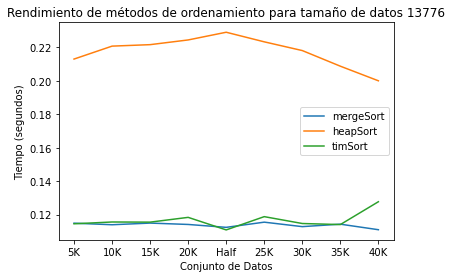


Tabla para tamaño de datos 13776:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.114910  0.213062  0.114537
1               10K   0.113965  0.220798  0.115618
2               15K   0.114961  0.221679  0.115523
3               20K   0.114143  0.224497  0.118384
4              Half   0.112411  0.229102  0.110875
5               25K   0.115513  0.223367  0.118813
6               30K   0.112839  0.218146  0.114707
7               35K   0.114308  0.208802  0.114069
8               40K   0.110996  0.200068  0.127729

Grafico para tamaño de datos 14637:



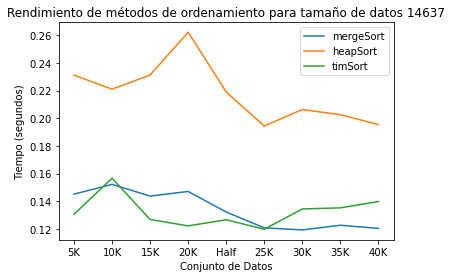


Tabla para tamaño de datos 14637:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.145196  0.231173  0.130637
1               10K   0.152250  0.221012  0.156728
2               15K   0.143790  0.231279  0.126863
3               20K   0.147121  0.262146  0.122270
4              Half   0.132266  0.218991  0.126691
5               25K   0.120832  0.194416  0.119824
6               30K   0.119348  0.206318  0.134495
7               35K   0.122713  0.202622  0.135286
8               40K   0.120473  0.195473  0.139865

Grafico para tamaño de datos 15498:



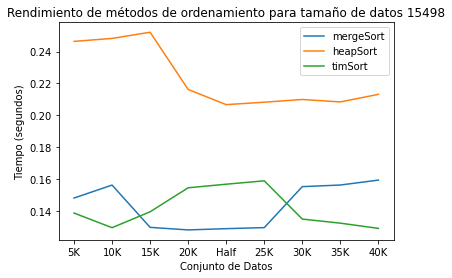


Tabla para tamaño de datos 15498:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.148179  0.246371  0.138781
1               10K   0.156299  0.248237  0.129590
2               15K   0.129798  0.252100  0.139562
3               20K   0.128193  0.216223  0.154610
4              Half   0.128977  0.206723  0.156845
5               25K   0.129639  0.208246  0.158969
6               30K   0.155318  0.209951  0.134992
7               35K   0.156333  0.208428  0.132424
8               40K   0.159421  0.213171  0.129161

Grafico para tamaño de datos 16359:



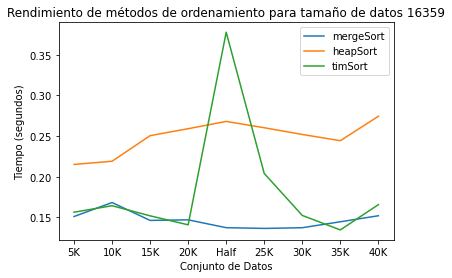


Tabla para tamaño de datos 16359:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.151132  0.215207  0.156453
1               10K   0.168351  0.219117  0.164429
2               15K   0.146360  0.250623  0.151991
3               20K   0.147061  0.259146  0.140919
4              Half   0.137416  0.268101  0.377790
5               25K   0.136510  0.260326  0.204094
6               30K   0.137386  0.252065  0.152471
7               35K   0.144675  0.244434  0.134671
8               40K   0.152098  0.274429  0.165772

Grafico para tamaño de datos 17220:



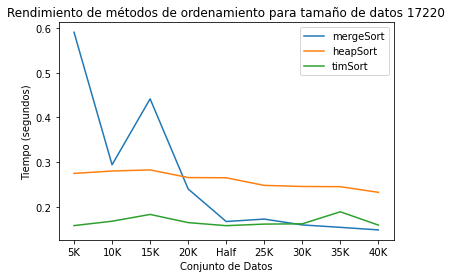


Tabla para tamaño de datos 17220:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.590738  0.274524  0.157555
1               10K   0.293837  0.279879  0.167417
2               15K   0.441491  0.282328  0.182585
3               20K   0.239680  0.265248  0.164279
4              Half   0.166707  0.264676  0.157420
5               25K   0.172178  0.247664  0.160947
6               30K   0.159120  0.245244  0.161605
7               35K   0.153672  0.244766  0.188524
8               40K   0.147912  0.232117  0.158702

Grafico para tamaño de datos 18081:



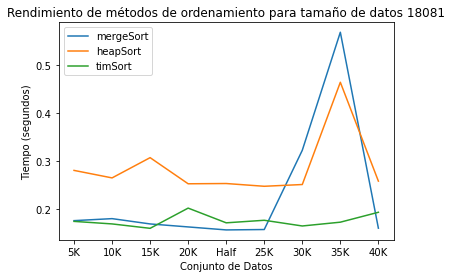


Tabla para tamaño de datos 18081:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.175812  0.280684  0.174272
1               10K   0.180010  0.265016  0.168977
2               15K   0.168945  0.307287  0.159787
3               20K   0.162704  0.252750  0.201991
4              Half   0.156465  0.253291  0.171267
5               25K   0.157284  0.247535  0.176586
6               30K   0.322677  0.251200  0.164684
7               35K   0.569010  0.464621  0.172611
8               40K   0.160072  0.258288  0.193276

Grafico para tamaño de datos 18942:



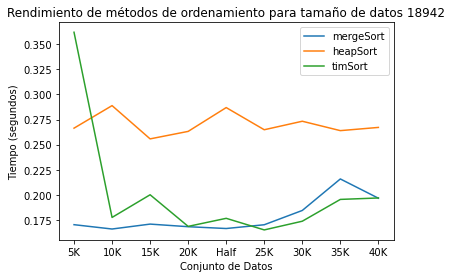


Tabla para tamaño de datos 18942:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.170203  0.266389  0.361982
1               10K   0.165880  0.288861  0.177428
2               15K   0.170779  0.255709  0.200010
3               20K   0.168184  0.263169  0.168501
4              Half   0.166377  0.286899  0.176534
5               25K   0.170128  0.264811  0.164982
6               30K   0.184377  0.273287  0.173655
7               35K   0.215773  0.263927  0.195383
8               40K   0.196580  0.267128  0.196828

Grafico para tamaño de datos 19803:



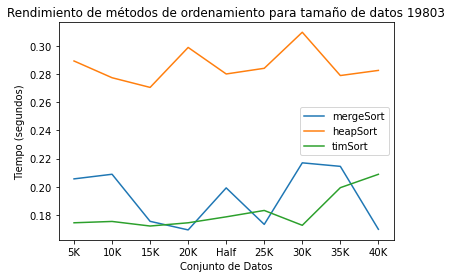


Tabla para tamaño de datos 19803:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.205576  0.289391  0.174365
1               10K   0.208860  0.277480  0.175311
2               15K   0.175392  0.270600  0.172058
3               20K   0.169292  0.299015  0.174359
4              Half   0.199166  0.280156  0.178588
5               25K   0.173224  0.284185  0.183125
6               30K   0.216979  0.309818  0.172575
7               35K   0.214476  0.279036  0.199325
8               40K   0.169742  0.282689  0.208825

Grafico para tamaño de datos 20664:



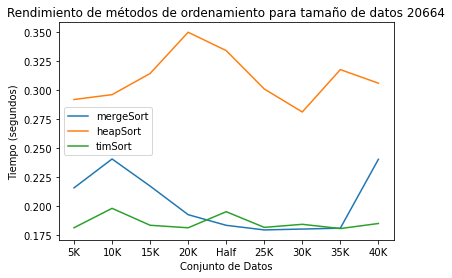


Tabla para tamaño de datos 20664:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.215567  0.291602  0.181243
1               10K   0.240421  0.295789  0.197944
2               15K   0.217100  0.314010  0.183382
3               20K   0.192500  0.349500  0.181208
4              Half   0.183336  0.333702  0.195053
5               25K   0.179376  0.300677  0.181570
6               30K   0.180115  0.280876  0.184198
7               35K   0.180878  0.317339  0.180547
8               40K   0.240135  0.305657  0.184902

Grafico para tamaño de datos 21525:



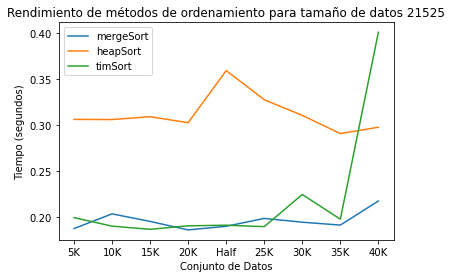


Tabla para tamaño de datos 21525:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.187817  0.306498  0.199700
1               10K   0.203780  0.306316  0.190410
2               15K   0.195552  0.309431  0.186977
3               20K   0.186317  0.302896  0.190790
4              Half   0.190279  0.359578  0.191406
5               25K   0.198813  0.327913  0.189882
6               30K   0.194710  0.310842  0.224812
7               35K   0.191582  0.291082  0.197961
8               40K   0.217717  0.297950  0.401252

Grafico para tamaño de datos 22386:



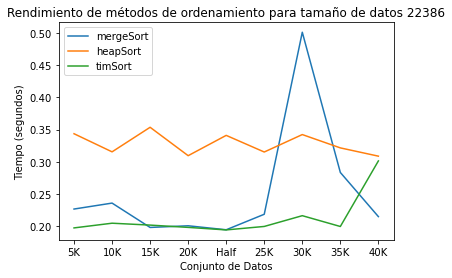


Tabla para tamaño de datos 22386:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.226783  0.343551  0.197535
1               10K   0.236003  0.315460  0.204813
2               15K   0.198244  0.353544  0.201888
3               20K   0.200826  0.309523  0.198333
4              Half   0.194645  0.340990  0.194416
5               25K   0.218687  0.315206  0.199787
6               30K   0.500889  0.342246  0.216486
7               35K   0.283489  0.321587  0.199722
8               40K   0.215047  0.308772  0.301385

Grafico para tamaño de datos 23247:



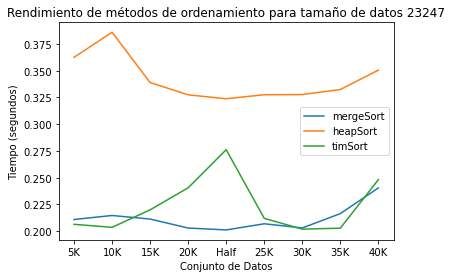


Tabla para tamaño de datos 23247:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.210972  0.362485  0.206472
1               10K   0.214718  0.385932  0.203642
2               15K   0.211377  0.338934  0.219972
3               20K   0.202983  0.327447  0.240589
4              Half   0.201233  0.323782  0.276209
5               25K   0.206965  0.327538  0.212038
6               30K   0.203067  0.327700  0.201952
7               35K   0.216466  0.332420  0.202863
8               40K   0.240515  0.350540  0.248220

Grafico para tamaño de datos 24108:



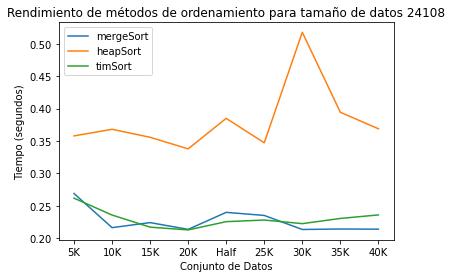


Tabla para tamaño de datos 24108:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.268927  0.357880  0.261746
1               10K   0.216234  0.368120  0.235684
2               15K   0.224005  0.355719  0.216986
3               20K   0.213560  0.337886  0.212717
4              Half   0.239835  0.385007  0.225444
5               25K   0.235075  0.347218  0.227990
6               30K   0.213382  0.517948  0.222406
7               35K   0.214131  0.394343  0.230430
8               40K   0.213835  0.368917  0.235879

Grafico para tamaño de datos 24969:



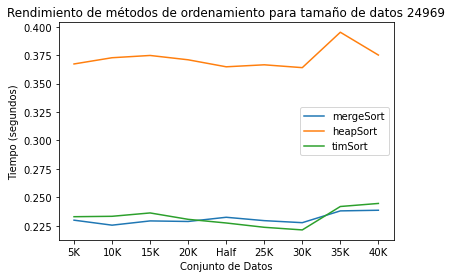


Tabla para tamaño de datos 24969:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.229877  0.367246  0.232919
1               10K   0.225477  0.372723  0.233273
2               15K   0.229218  0.374715  0.236229
3               20K   0.228732  0.370909  0.230612
4              Half   0.232423  0.364749  0.227400
5               25K   0.229458  0.366505  0.223610
6               30K   0.227671  0.364003  0.221304
7               35K   0.238038  0.395137  0.241896
8               40K   0.238602  0.375082  0.244582

Grafico para tamaño de datos 25830:



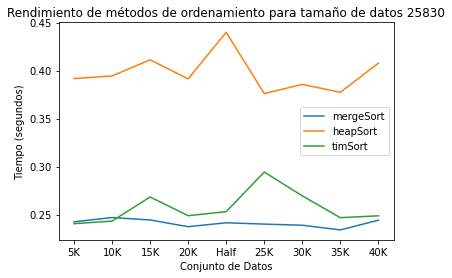


Tabla para tamaño de datos 25830:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.242441  0.391664  0.240511
1               10K   0.246923  0.394454  0.243226
2               15K   0.244403  0.411178  0.268318
3               20K   0.237369  0.391368  0.248847
4              Half   0.241465  0.439946  0.253044
5               25K   0.240077  0.376026  0.294317
6               30K   0.238894  0.385650  0.269500
7               35K   0.234019  0.377372  0.246769
8               40K   0.244145  0.407743  0.248723

Grafico para tamaño de datos 26481:



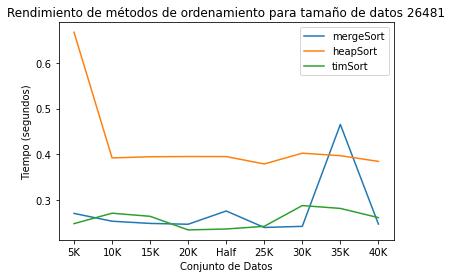


Tabla para tamaño de datos 26481:

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.271628  0.666412  0.249334
1               10K   0.254599  0.392542  0.272078
2               15K   0.249820  0.395033  0.265310
3               20K   0.248003  0.395621  0.235651
4              Half   0.276904  0.395493  0.237634
5               25K   0.240965  0.379402  0.243503
6               30K   0.243430  0.402830  0.288701
7               35K   0.465455  0.397420  0.282523
8               40K   0.248440  0.384965  0.262416


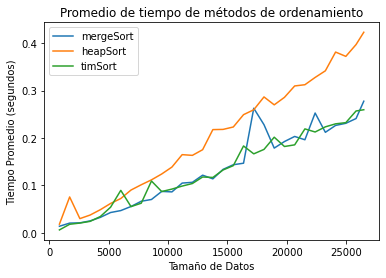


Tabla de Promedios:

    Tamaño de Datos  mergeSort  heapSort   timSort
0               861   0.013679  0.018132  0.005940
1              1722   0.020327  0.075528  0.017846
2              2583   0.020866  0.029791  0.020413
3              3444   0.024961  0.037333  0.024013
4              4305   0.032422  0.048637  0.034198
5              5166   0.042677  0.061767  0.053832
6              6027   0.046762  0.072253  0.089440
7              6888   0.055432  0.090136  0.055118
8              7749   0.066448  0.101306  0.062352
9              8610   0.070195  0.111638  0.109190
10             9471   0.087229  0.124022  0.086940
11            10332   0.086228  0.138649  0.092143
12            11193   0.104813  0.164857  0.098490
13            12054   0.106447  0.163362  0.103894
14            12915   0.121504  0.175279  0.117681
15            13776   0.113783  0.217724  0.116695
16            14637   0.133777  0.218159  0.132518
17            15498   0.143573  0.223272  0.141659
18       

In [92]:
import time
import matplotlib.pyplot as plt
import pandas as pd



# Ejecución para cada tamaño de datos
all_results = {size: methodsPerformance(sort_methods, size, lists) for size in sizes_data}
averages = calculateAverages(all_results, sizes_data)

# Mostrar resultados
showResults(all_results, sizes_data, table_names, averages)